In [43]:
data_train_path='C:/Users/91835/Downloads/Slugterra/test'
data_test_path= 'C:/Users/91835/Downloads/Slugterra/train'
data_val_path='C:/Users/91835/Downloads/Slugterra/validation'

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as* tf

from tensorflow import keras
from tensorflow.keras import layers

In [45]:
img_width=180
img_height=180

In [46]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 14211 files belonging to 10 classes.


In [47]:
data_cat = data_train.class_names

In [48]:
data_cat

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [49]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                       shuffle=False,
                                                      validation_split=False)

Found 14211 files belonging to 10 classes.


In [50]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 14211 files belonging to 10 classes.


In [51]:
# plt.figure(figsize=(10,10))
# for image, labels in data_train.take(1):
#     for i in range(9):
#         plt.subplot(3,3,i+1)
#         plt.imshow(image[i].numpy.astype('uint8'))
#         plt.title(data_cat[labels[i]])
#         plt.show()

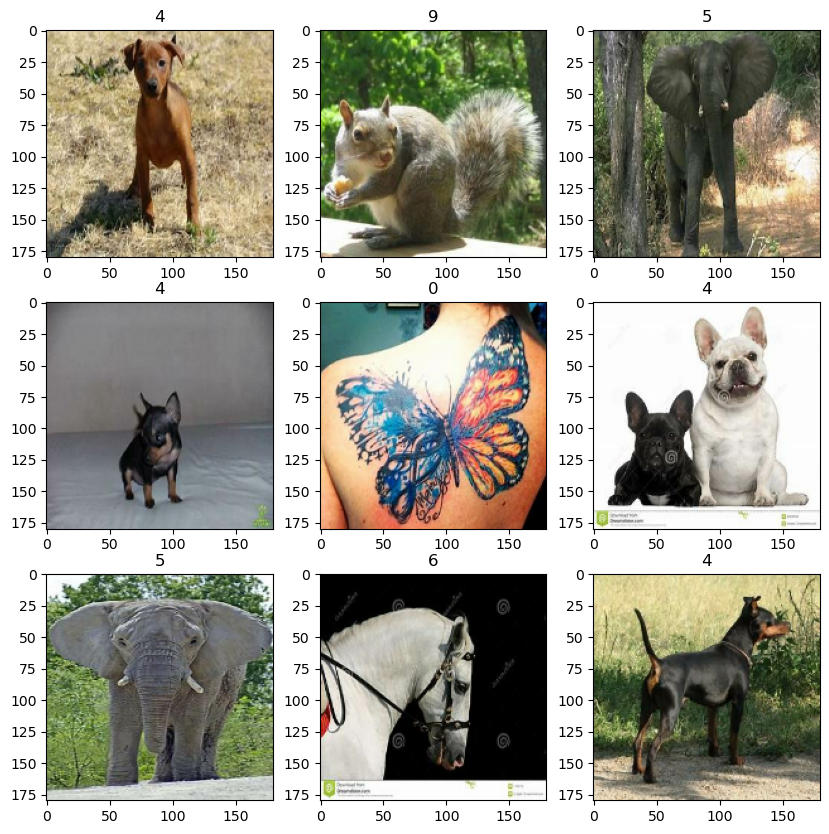

In [52]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(labels[i].numpy())  # Assuming labels are integers
plt.show()

In [53]:
from tensorflow.keras.models import Sequential 

In [54]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [56]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [57]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size ,)

Epoch 1/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 154s 340ms/step - accuracy: 0.4144 - loss: 1.8755 - val_accuracy: 0.6202 - val_loss: 1.1328
Epoch 2/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 169s 379ms/step - accuracy: 0.6035 - loss: 1.1958 - val_accuracy: 0.7413 - val_loss: 0.7940
Epoch 3/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 189s 425ms/step - accuracy: 0.6878 - loss: 0.9260 - val_accuracy: 0.7775 - val_loss: 0.6528
Epoch 4/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 216s 485ms/step - accuracy: 0.7672 - loss: 0.6860 - val_accuracy: 0.7935 - val_loss: 0.5859
Epoch 5/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 388s 873ms/step - accuracy: 0.8233 - loss: 0.5155 - val_accuracy: 0.8805 - val_loss: 0.3548
Epoch 6/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 373s 833ms/step - accuracy: 0.8668 - loss: 0.3852 - val_accuracy: 0.9191 - val_loss: 0.2501
Epoch 7/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 283s 630ms/step - accuracy: 0.8893 - loss: 0.3284 - val_accuracy: 0.9035 - val_loss: 0.2683
Epoch 8/25
445/445 ━━━━━━━━━━━━━━━━━━━━ 172s 386ms/step - accuracy: 0.9069 -

Text(0.5, 1.0, 'loss')

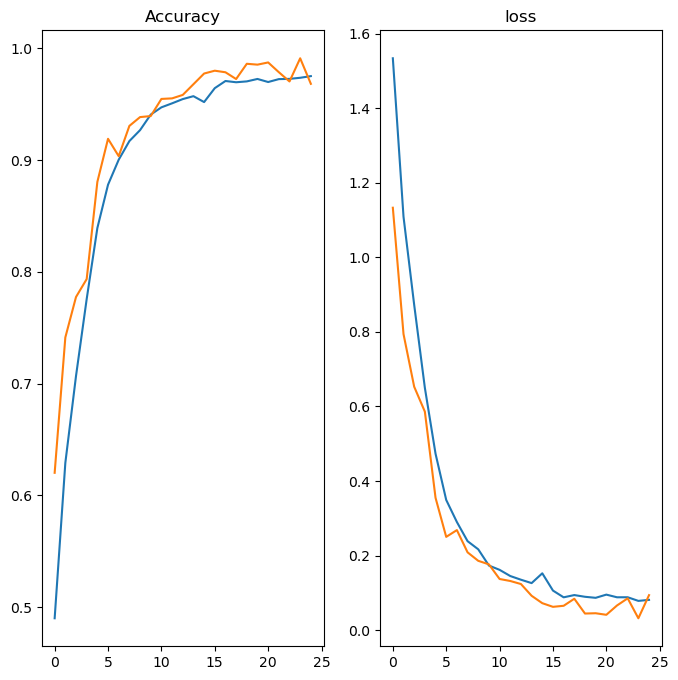

In [58]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label = 'Training loss')
plt.plot(epochs_range, history.history['val_loss'],label= 'Validation loss')
plt.title('loss')

In [64]:
image ='2.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [65]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [66]:
score = tf.nn.softmax(predict)

In [67]:
print('Animal in image is {} with accuracy of {:0.2f}'.format (data_cat[np.argmax(score)], np.max(score)*100))

Animal in image is chicken with accuracy of 100.00


In [63]:
model.save('Image_classify.keras')